<a href="https://colab.research.google.com/github/ris-shar/Fashion_Mnist/blob/main/tf_fashion_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np

In [ ]:
fashion_mnist = tf.keras.datasets.fashion_mnist

In [ ]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# analyzing dataset
print(type(x_train))
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)

<class 'numpy.ndarray'>
(60000, 28, 28) (10000, 28, 28)
(60000,) (10000,)


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Ankle boot


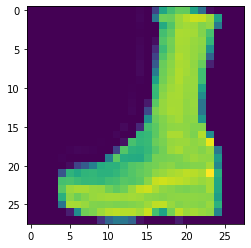

In [ ]:
# Visualizing dataset
num1 = np.random.randint(x_train.shape[0])
plt.imshow(x_train[num1])
print(class_names[y_train[num1]])

In [ ]:
# Normalizing dataset
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test  = tf.keras.utils.normalize(x_test, axis=1)

In [ ]:
# Reshaping dataset
x_train = x_train.reshape(x_train.shape[0], 784)
x_test = x_test.reshape(x_test.shape[0],784)

In [ ]:
## making layer using classes
class Linear_layer(tf.keras.layers.Layer):
  def __init__(self, units = 32, input_dim = 32, activation='relu'):
    super(Linear_layer, self).__init__()
    self.w = self.add_weight(shape = (input_dim, units), initializer='random_normal', trainable=True)
    self.b = self.add_weight(shape = (units, ), initializer='zeros', trainable=True)
    self.activation = activation

  def call(self, inputs):
    if self.activation == 'relu':
      return tf.keras.activations.relu(tf.matmul(inputs, self.w)+self.b)
    elif self.activation == "softmax":
       return tf.keras.activations.softmax(tf.matmul(inputs, self.w)+self.b)

In [ ]:
## LEC 4 SUBCLASSING/USING CLASS
class Layer_block(tf.keras.layers.Layer):
  def __init__(self,num_layer=3,units=(32,32,32),input_dim=784):
    super(Layer_block, self).__init__()
    # self.layer_1 = Linear_layer(128,784)
    # self.layer_2 = Linear_layer(128,128)
    # self.layer_3 = Linear_layer(10,128,activation='softmax')
    self.layer = []
    self.input_dim = input_dim

    for i in range(num_layer-1):
      self.layer.append(Linear_layer(units[i],self.input_dim))
      self.input_dim=units[i]
    self.layer.append(Linear_layer(10, self.input_dim, activation='softmax'))

  def call(self, inputs):
    # z1 = self.layer_1(inputs)
    # z2 = self.layer_2(z1)
    # z3 = self.layer_3(z2)
    self.inputs = inputs
    for l in self.layer:
      self.inputs = l(self.inputs)
    return self.inputs

In [ ]:
inputs = tf.keras.Input(shape=(784,))
network = Layer_block(num_layer=4, units=(256,256,256,256))
output_layer = network(inputs)
custom_model = tf.keras.Model(inputs = inputs, outputs = output_layer)

In [ ]:
custom_model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
custom_model.fit(x_train, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 16s 8ms/step - loss: 0.4812 - accuracy: 0.8203
Epoch 2/20
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3560 - accuracy: 0.8670
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3177 - accuracy: 0.8807
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2935 - accuracy: 0.8902
Epoch 5/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2749 - accuracy: 0.8956
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2592 - accuracy: 0.9021
Epoch 7/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2453 - accuracy: 0.9068
Epoch 8/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2323 - accuracy: 0.9125
Epoch 9/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2217 - accuracy: 0.9165
Epoch 10/20
1875/1875 [==============================] - 10s 5ms/step - l

In [ ]:
eval = custom_model.evaluate(x_test, y_test)
print(eval)

313/313 [==============================] - 1s 2ms/step - loss: 0.4084 - accuracy: 0.8910
[0.4084165096282959, 0.890999972820282]


In [ ]:
# predictiong values
y_pred = custom_model.predict(x_test)

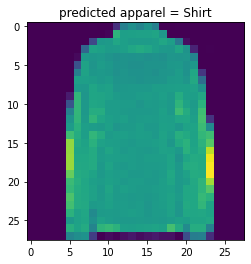

In [ ]:
# Visualizing prediction
num1 = np.random.randint(y_pred.shape[0])
prediction = np.argmax(y_pred[num1])
plt.title("predicted apparel = "+str(class_names[prediction]))

plt.imshow(x_test[num1].reshape(28,28))

In [ ]:
% cd /content/drive/MyDrive/Colab Notebooks

/content/drive/MyDrive/Colab Notebooks


In [ ]:
custom_model.save("cfashion_mnist.model")

TypeError: ignored

In [ ]:
## LEC-5 CUSTOM TRAINING LOOP
